In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Exploratory Data Analysis

In [5]:
## load data set
data = pd.read_csv('fake_transactional_data_24.csv')
data.head()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
1,88339.0,2.40,40544,01/01/2025
2,18555.0,2.40,85149,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
4,80792.0,1.95,18555,01/01/2025


In [6]:
data.shape

(10148280, 4)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10148280 entries, 0 to 10148279
Data columns (total 4 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   from_totally_fake_account      float64
 1   monopoly_money_amount          float64
 2   to_randomly_generated_account  object 
 3   not_happened_yet_date          object 
dtypes: float64(2), object(2)
memory usage: 309.7+ MB


In [8]:
data.dtypes

from_totally_fake_account        float64
monopoly_money_amount            float64
to_randomly_generated_account     object
not_happened_yet_date             object
dtype: object

In [9]:
data.columns 

Index(['from_totally_fake_account', 'monopoly_money_amount',
       'to_randomly_generated_account', 'not_happened_yet_date'],
      dtype='object')

In [36]:
data.isnull()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
10148275,False,False,False,False
10148276,False,False,False,False
10148277,False,False,False,False
10148278,False,False,False,False


In [11]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 from_totally_fake_account        0
monopoly_money_amount            0
to_randomly_generated_account    0
not_happened_yet_date            0
dtype: int64


In [12]:
data.describe()

,from_totally_fake_account,monopoly_money_amount
count,1.014828e+07,1.014828e+07
mean,5.080502e+04,1.839348e+01
std,2.893710e+04,8.612323e+01
min,1.000000e+03,1.450000e+00
25%,2.530400e+04,2.650000e+00
50%,5.078100e+04,6.000000e+00
75%,7.563300e+04,1.200000e+01
max,1.009880e+05,1.995000e+03


In [13]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
from_totally_fake_account,10148280.0,50805.021701,28937.100678,1000.00,25304.00,50781.0,75633.0,100988.0
monopoly_money_amount,10148280.0,18.393485,86.123232,1.45,2.65,6.0,12.0,1995.0


In [14]:
data.describe(include=['O'])

,to_randomly_generated_account,not_happened_yet_date
count,10148280,10148280
unique,14300,364
top,PUB,12/12/2025
freq,834380,52379


In [15]:
data.describe().astype(int)

,from_totally_fake_account,monopoly_money_amount
count,10148280,10148280
mean,50805,18
std,28937,86
min,1000,1
25%,25304,2
50%,50781,6
75%,75633,12
max,100988,1995


In [16]:
data.describe(include='all')

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
count,1.014828e+07,1.014828e+07,10148280,10148280
unique,NaN,NaN,14300,364
top,NaN,NaN,PUB,12/12/2025
freq,NaN,NaN,834380,52379
mean,5.080502e+04,1.839348e+01,NaN,NaN
std,2.893710e+04,8.612323e+01,NaN,NaN
min,1.000000e+03,1.450000e+00,NaN,NaN
25%,2.530400e+04,2.650000e+00,NaN,NaN
50%,5.078100e+04,6.000000e+00,NaN,NaN
75%,7.563300e+04,1.200000e+01,NaN,NaN


In [17]:
## float to integer
data['from_totally_fake_account'] = data['from_totally_fake_account'].astype(int)

In [18]:
# nearest integer/ rounding
data['monopoly_money_amount'] = data['monopoly_money_amount'].round().astype(int)

In [19]:
# Convert the 'not_happened_yet_date' column to datetime
data['not_happened_yet_date'] = pd.to_datetime(data['not_happened_yet_date'], format='%d/%m/%Y')

In [20]:
data.head(3)

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371,4,CINEMA,2025-01-01
1,88339,2,40544,2025-01-01
2,18555,2,85149,2025-01-01


In [21]:
data.nunique()

from_totally_fake_account         8142
monopoly_money_amount              915
to_randomly_generated_account    14300
not_happened_yet_date              364
dtype: int64

### Key points from dataset:
1. Total 8142 Account users
2. 14300 places where the users spent money
3. total days 364..why??
   - In normal year 365
   - In leap year 366
   -- But why 364
    

In [30]:
data.not_happened_yet_date.unique()

array(['2025-01-01T00:00:00.000000000', '2025-01-02T00:00:00.000000000',
       '2025-01-03T00:00:00.000000000', '2025-01-04T00:00:00.000000000',
       '2025-01-05T00:00:00.000000000', '2025-01-06T00:00:00.000000000',
       '2025-01-07T00:00:00.000000000', '2025-01-08T00:00:00.000000000',
       '2025-01-09T00:00:00.000000000', '2025-01-10T00:00:00.000000000',
       '2025-01-11T00:00:00.000000000', '2025-01-12T00:00:00.000000000',
       '2025-01-13T00:00:00.000000000', '2025-01-14T00:00:00.000000000',
       '2025-01-15T00:00:00.000000000', '2025-01-16T00:00:00.000000000',
       '2025-01-17T00:00:00.000000000', '2025-01-18T00:00:00.000000000',
       '2025-01-19T00:00:00.000000000', '2025-01-20T00:00:00.000000000',
       '2025-01-21T00:00:00.000000000', '2025-01-22T00:00:00.000000000',
       '2025-01-23T00:00:00.000000000', '2025-01-24T00:00:00.000000000',
       '2025-01-25T00:00:00.000000000', '2025-01-26T00:00:00.000000000',
       '2025-01-27T00:00:00.000000000', '2025-01-28

In [33]:
# Replace '2025' with the actual year you are analyzing
full_date_range = pd.date_range(start='2025-01-01', end='2025-12-31')

In [35]:
# Find dates that are in the full range but not in your dataset
missing_dates = full_date_range.difference(data['not_happened_yet_date'])
missing_dates

DatetimeIndex(['2025-08-22'], dtype='datetime64[ns]', freq=None)

### 2025-08-22 is missing .. why??
they did not make any payments?

### Transactional trends 

In [19]:
# Transaction Frequency
transaction_frequency = data['from_totally_fake_account'].value_counts()
transaction_frequency                       ## no.of trasactions done my user--- how many trasactions each user made

2331     2728
74448    2679
97033    2665
87324    2619
14877    2503
         ... 
30617     537
22078     524
68848     513
19964     504
55938     436
Name: from_totally_fake_account, Length: 8142, dtype: int64

In [20]:
# Total Transaction Amount
total_transaction_amount = data.groupby('from_totally_fake_account')['monopoly_money_amount'].sum()
total_transaction_amount         ## amount spent by user

from_totally_fake_account
1000      28603
1002      15590
1006      18715
1018      15697
1053      19397
          ...  
100931    22289
100934    18541
100947    20765
100986    15284
100988    19651
Name: monopoly_money_amount, Length: 8142, dtype: int32

In [21]:
total_transaction_amount.shape

(8142,)

In [22]:
# Transaction Types
transaction_types = data['to_randomly_generated_account'].unique()
transaction_types

array(['CINEMA', '40544', '85149', ..., '24636', '1243', 'TURKEY_FARM'],
      dtype=object)

In [23]:
transaction_types.shape

(14300,)

In [24]:
data.corr()

,from_totally_fake_account,monopoly_money_amount
from_totally_fake_account,1.000000,0.001429
monopoly_money_amount,0.001429,1.000000


<Axes: >

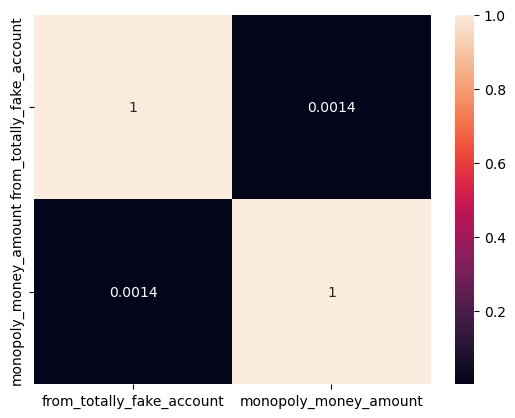

In [25]:
sns.heatmap(data.corr(),annot=True)

## Outliers

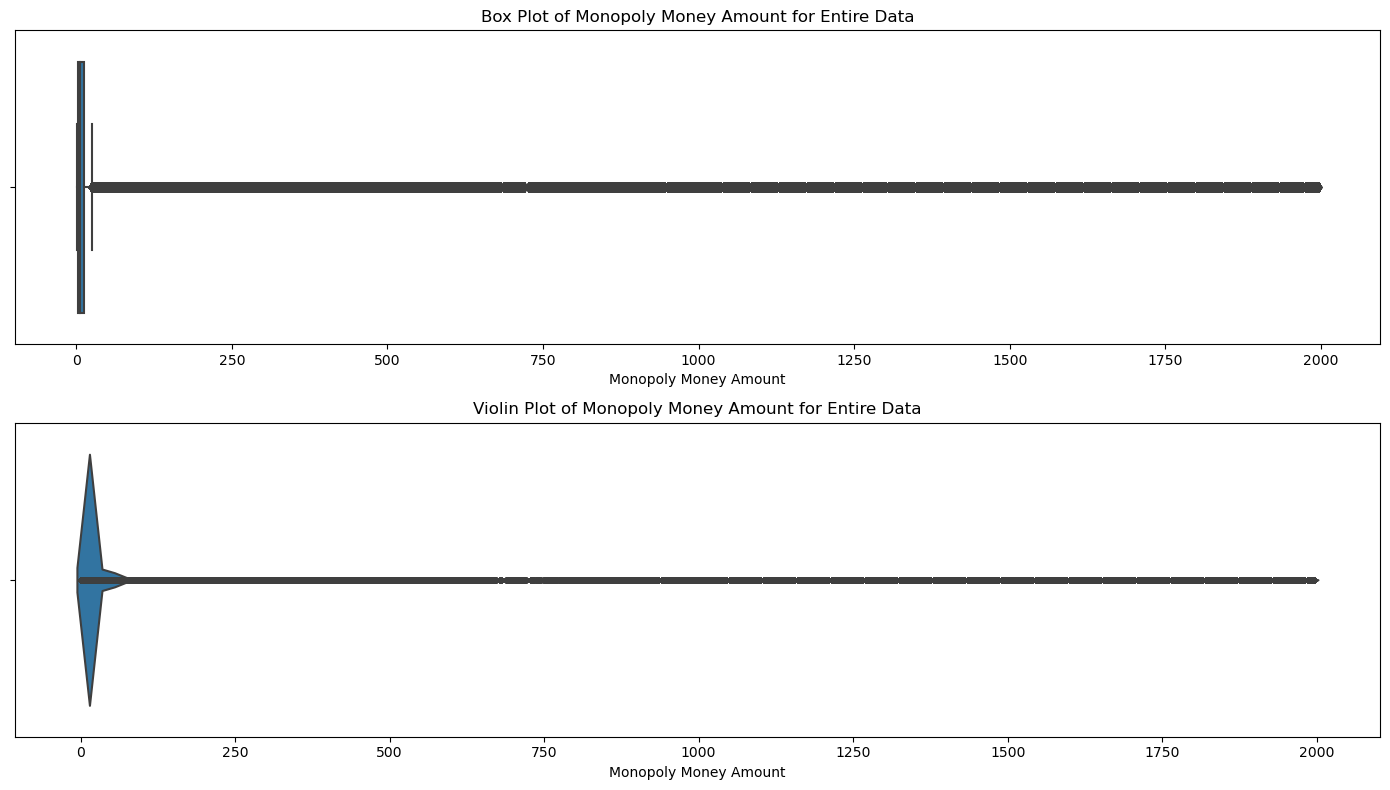

In [26]:
plt.figure(figsize=(14, 8))

# Box plot for the entire dataset
plt.subplot(2, 1, 1)
sns.boxplot(data=data, x='monopoly_money_amount')
plt.title('Box Plot of Monopoly Money Amount for Entire Data')
plt.xlabel('Monopoly Money Amount')

# Violin plot for the entire dataset
plt.subplot(2, 1, 2)
sns.violinplot(data=data, x='monopoly_money_amount', inner='point')
plt.title('Violin Plot of Monopoly Money Amount for Entire Data')
plt.xlabel('Monopoly Money Amount')

plt.tight_layout()
plt.show()


In [27]:
# If focusing uniquely on 'monopoly_money_amount'
unique_monopoly_amounts = data[['monopoly_money_amount']].drop_duplicates()

# If referring to entirely unique rows across all columns
unique_rows = data.drop_duplicates()

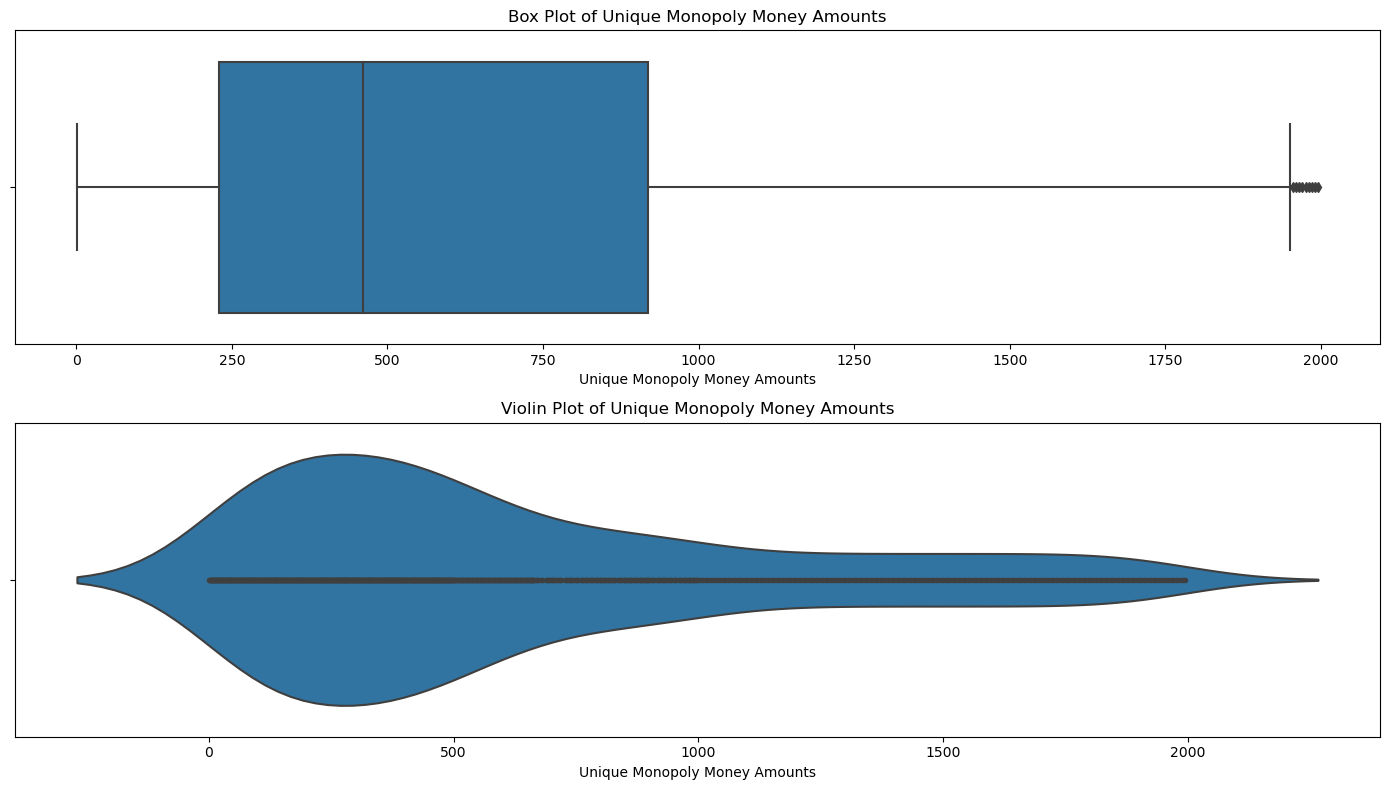

In [28]:
plt.figure(figsize=(14, 8))

# Box plot for unique transaction amounts
plt.subplot(2, 1, 1)
sns.boxplot(data=unique_monopoly_amounts, x='monopoly_money_amount')
plt.title('Box Plot of Unique Monopoly Money Amounts')
plt.xlabel('Unique Monopoly Money Amounts')

# Violin plot for unique transaction amounts
plt.subplot(2, 1, 2)
sns.violinplot(data=unique_monopoly_amounts, x='monopoly_money_amount', inner='point')
plt.title('Violin Plot of Unique Monopoly Money Amounts')
plt.xlabel('Unique Monopoly Money Amounts')

plt.tight_layout()
plt.show()

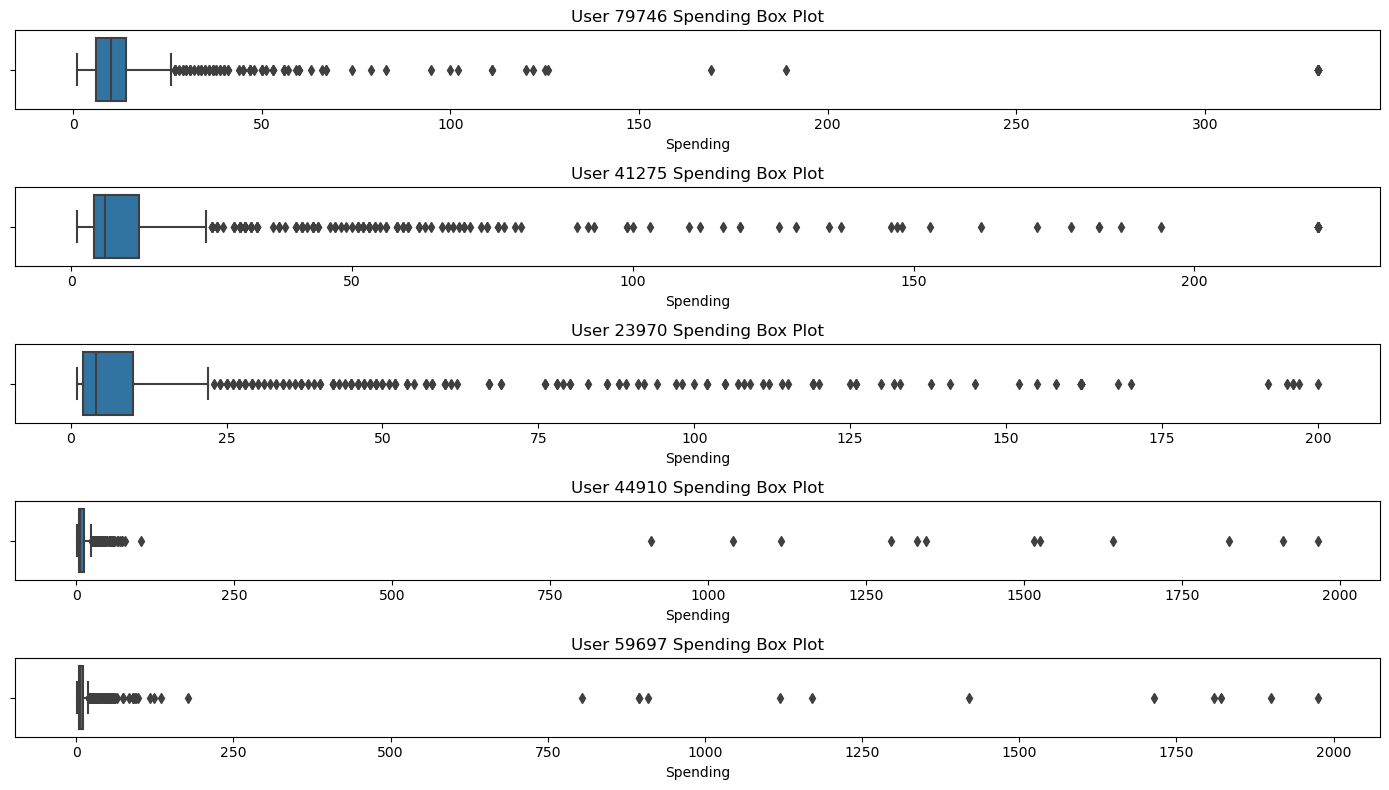

In [29]:

# Ensure this column is treated as an integer for user IDs
data['from_totally_fake_account'] = data['from_totally_fake_account'].astype(int)

# Select a subset of unique user IDs; here we ensure it's defined
# If the dataset is large, you might want to sample a subset of users
unique_users = data['from_totally_fake_account'].unique()

# Sample a manageable number of users if there are too many, adjust 'n' as needed
n = min(5, len(unique_users))  # Let's ensure we do not exceed the total number of unique users
subset_of_users = pd.Series(unique_users).sample(n=n, random_state=1).values

plt.figure(figsize=(14, 8))

# Loop through each user in the subset and create a box plot
for index, user_id in enumerate(subset_of_users):
    plt.subplot(n, 1, index + 1)
    user_data = data[data['from_totally_fake_account'] == user_id]
    sns.boxplot(data=user_data, x='monopoly_money_amount')
    plt.title(f'User {user_id} Spending Box Plot')
    plt.xlabel('Spending')
    plt.tight_layout()

plt.show()

### Trends

### lots of transactions are for smaller sums.

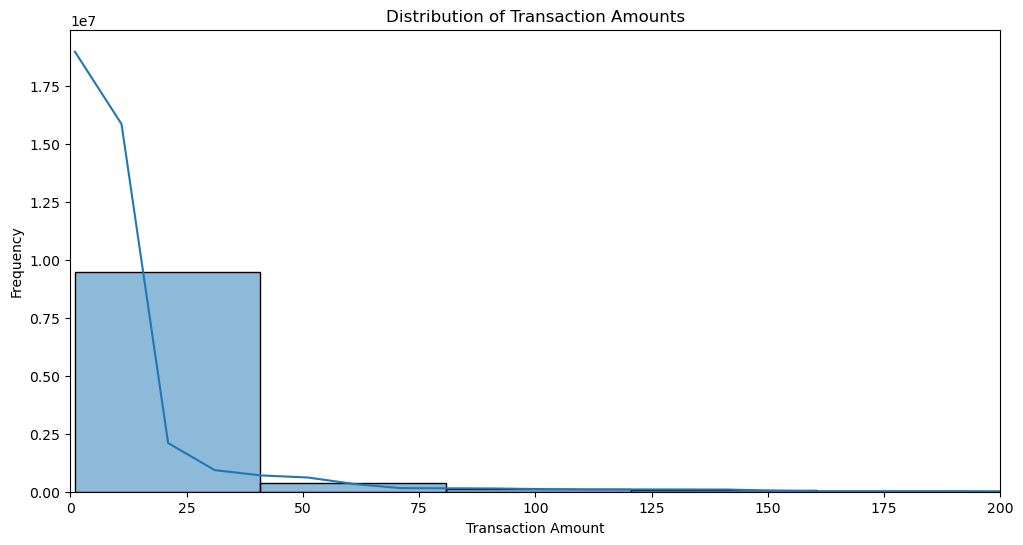

In [30]:
# 1. Distribution of Transaction Amounts
plt.figure(figsize=(12, 6))
sns.histplot(data['monopoly_money_amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.xlim(0, 200)  # Limiting x-axis for better visibility, adjust as needed
plt.show()

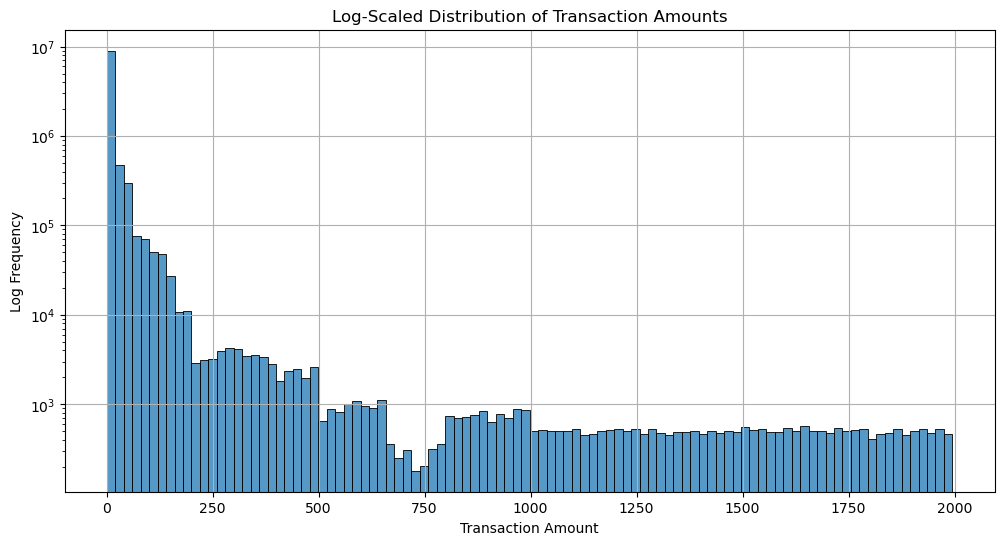

In [31]:
plt.figure(figsize=(12, 6))
# Using a log scale for the y-axis to better visualize the distribution
sns.histplot(data['monopoly_money_amount'], bins=100, kde=False, log_scale=(False, True))
plt.title('Log-Scaled Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Log Frequency')
plt.grid(True)  # Adding a grid for better readability
plt.show()

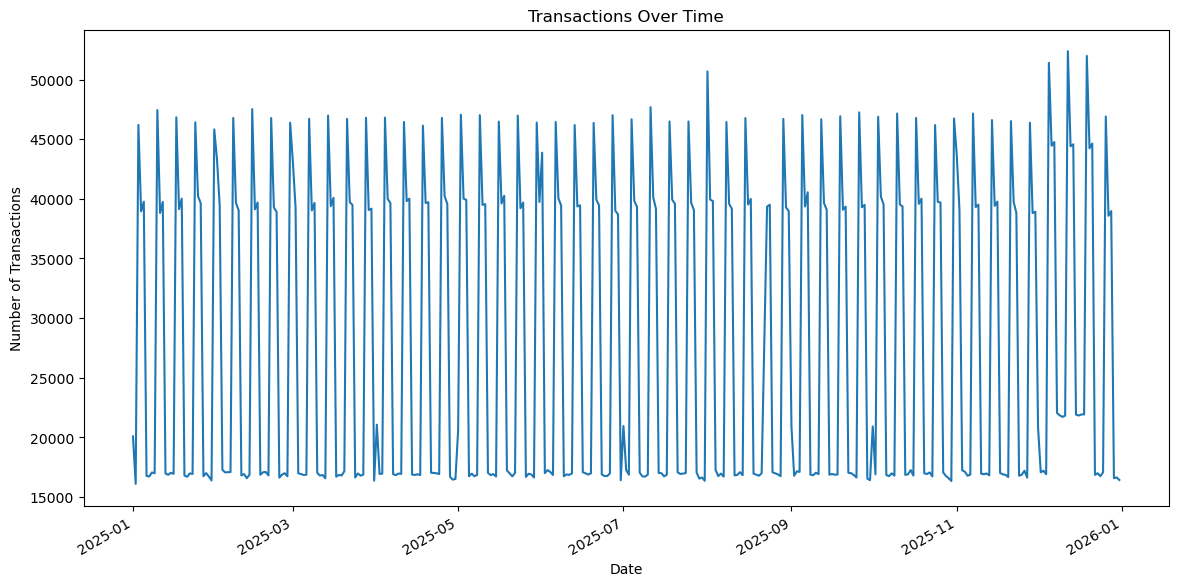

In [32]:
# Plot transactions over time using 'not_happened_yet_date'
transactions_over_time = data.groupby('not_happened_yet_date').count()['from_totally_fake_account']

plt.figure(figsize=(14, 7))
transactions_over_time.plot()
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

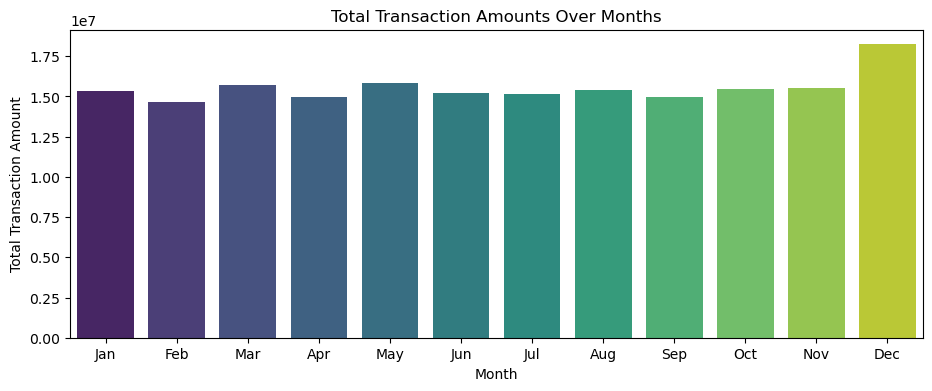

In [33]:
# Aggregate the total transaction amount for each month directly in the grouping operation
monthly_amounts = data.groupby(data['not_happened_yet_date'].dt.month)['monopoly_money_amount'].sum()

# Plotting the aggregated transaction amounts over months
plt.figure(figsize=(11, 4))
sns.barplot(x=monthly_amounts.index, y=monthly_amounts.values, palette="viridis")
plt.title('Total Transaction Amounts Over Months')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Customer segmentation
1. Segmentation by 'Monopoly Money Amount' (Transaction Amount of user)
2. Segmentation by (count) Transaction Frequency (No. of transactions)
3. Segmentation by 'To Randomly Generated Account' (to whoom they are paying)
4. Segmentation by Date (On which date)
5. Combination of Segmentation Criteria (To get targets)

### 1. Segmentation by 'Monopoly Money Amount' (Transaction Amount of user)

In [34]:
transaction_amount = data['monopoly_money_amount'].describe()
#transaction_amount

In [35]:
highest_spent_amount = data['monopoly_money_amount'].max()
highest_spent_amount   ## highest amount spent

1995

In [36]:
highest_spent_amount = data['monopoly_money_amount'].min()
highest_spent_amount

1

In [37]:
# Automatic segmentation based on quantiles
transaction_amount_segment = pd.qcut(data['monopoly_money_amount'], q=3, labels=['Low segment', 'Medium', 'High segment'])

# Count the number of transactions in each segment
segment_counts = transaction_amount_segment.value_counts()
print(segment_counts)

Low segment     3599719
Medium          3409943
High segment    3138618
Name: monopoly_money_amount, dtype: int64


In [38]:
# average transaction amounts for each segment
average_amounts = data.groupby(transaction_amount_segment)['monopoly_money_amount'].mean()
print("Average Transaction Amounts by Segment:\n", average_amounts)

Average Transaction Amounts by Segment:
 monopoly_money_amount
Low segment      2.599610
Medium           7.054123
High segment    48.744555
Name: monopoly_money_amount, dtype: float64


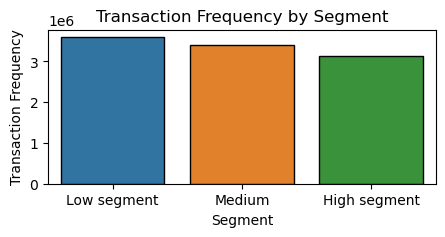

In [39]:
# Visualize customer patterns using transaction frequency
plt.figure(figsize=(5,2))
sns.countplot(x=transaction_amount_segment, edgecolor='black')
plt.xlabel('Segment')
plt.ylabel('Transaction Frequency')
plt.title('Transaction Frequency by Segment')
plt.show()

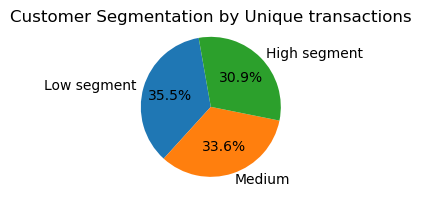

In [40]:
# Plot pie chart
plt.figure(figsize=(5,2))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=100)
plt.title('Customer Segmentation by Unique transactions')
plt.axis('equal')  #to draw a circle.
plt.show()

### 2. Segmentation by (count) Transaction Frequency (No. of transactions)

In [41]:
# Convert 'not_happened_yet_date' column to datetime format
data['not_happened_yet_date'] = pd.to_datetime(data['not_happened_yet_date'])

# Group the data by 'from_totally_fake_account' to calculate transaction frequency and total spending
customer_data = data.groupby('from_totally_fake_account').agg({
    'monopoly_money_amount': ['count', 'sum']  # Calculate count (frequency) and sum (total spending)
}).reset_index()

# Rename the columns for clarity
customer_data.columns = ['from_totally_fake_account', 'transaction_frequency', 'total_spending']

# Display the first few rows of the processed data
print(customer_data.head())


   from_totally_fake_account  transaction_frequency  total_spending
0                       1000                   1710           28603
1                       1002                   1043           15590
2                       1006                   1841           18715
3                       1018                    805           15697
4                       1053                   1319           19397


In [42]:
data['from_totally_fake_account'].value_counts()

2331     2728
74448    2679
97033    2665
87324    2619
14877    2503
         ... 
30617     537
22078     524
68848     513
19964     504
55938     436
Name: from_totally_fake_account, Length: 8142, dtype: int64

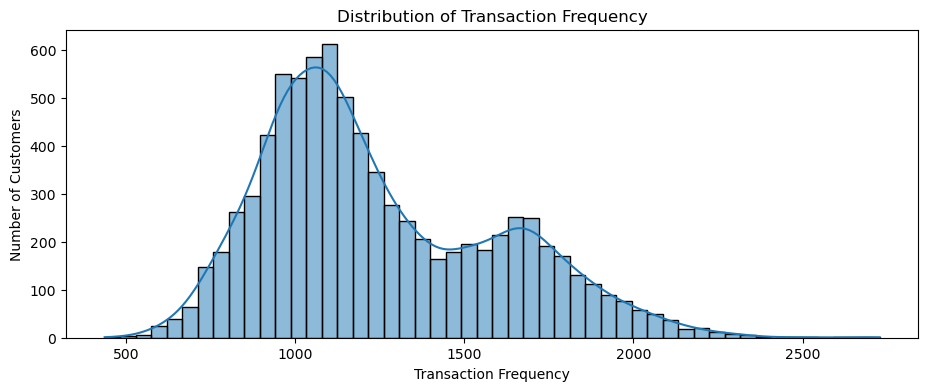

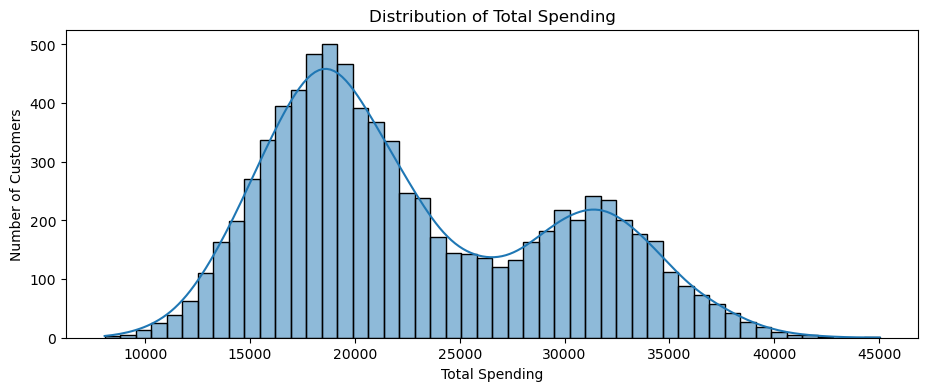

In [43]:
# Plotting the distribution of transaction frequency
plt.figure(figsize=(11,4))
sns.histplot(customer_data['transaction_frequency'], bins=50, kde=True)
plt.title('Distribution of Transaction Frequency')
plt.xlabel('Transaction Frequency')
plt.ylabel('Number of Customers')
plt.show()

# Plotting the distribution of total spending
plt.figure(figsize=(11,4))
sns.histplot(customer_data['total_spending'], bins=50, kde=True)
plt.title('Distribution of Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.show()

## Clustering Algorithm Selection:

In [40]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Initialize clustering algorithms
kmeans = KMeans(n_clusters=3)  # Specify the number of clusters
hierarchical = AgglomerativeClustering(n_clusters=3)  # Specify the number of clusters
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Specify epsilon and min_samples

# Fit the clustering algorithms to the data
kmeans.fit(data[['from_totally_fake_account', 'monopoly_money_amount']])
hierarchical.fit(data[['from_totally_fake_account', 'monopoly_money_amount']])
dbscan.fit(data[['from_totally_fake_account', 'monopoly_money_amount']])

MemoryError: Unable to allocate 375. TiB for an array with shape (51493788405060,) and data type float64

## cluster analysis

In [41]:
# Extract cluster labels
data['kmeans_cluster'] = kmeans.labels_
data['hierarchical_cluster'] = hierarchical.labels_
data['dbscan_cluster'] = dbscan.labels_

# Analyze clusters
kmeans_cluster_centers = kmeans.cluster_centers_
hierarchical_n_clusters = hierarchical.n_clusters_
dbscan_n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)  # Number of clusters excluding noise points

AttributeError: 'AgglomerativeClustering' object has no attribute 'labels_'

In [ ]:
import matplotlib.pyplot as plt

# Plot KMeans clusters
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.scatter(data['from_totally_fake_account'], data['monopoly_money_amount'], c=data['kmeans_cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans_cluster_centers[:, 0], kmeans_cluster_centers[:, 1], marker='x', c='red', s=100, label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('From Totally Fake Account')
plt.ylabel('Monopoly Money Amount')
plt.legend()

# Plot Hierarchical clusters
plt.subplot(1, 3, 2)
plt.scatter(data['from_totally_fake_account'], data['monopoly_money_amount'], c=data['hierarchical_cluster'], cmap='viridis', alpha=0.5)
plt.title('Hierarchical Clustering')
plt.xlabel('From Totally Fake Account')
plt.ylabel('Monopoly Money Amount')

# Plot DBSCAN clusters
plt.subplot(1, 3, 3)
plt.scatter(data['from_totally_fake_account'], data['monopoly_money_amount'], c=data['dbscan_cluster'], cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering')
plt.xlabel('From Totally Fake Account')
plt.ylabel('Monopoly Money Amount')

plt.tight_layout()
plt.show()


In [ ]:
# Step 2: Targeted Marketing Campaigns

# 1. Segment Identification (assuming you have already performed clustering and have cluster labels)
# For example, let's say we have three clusters: 'Cluster 0', 'Cluster 1', and 'Cluster 2'
# You may replace these with the actual cluster labels from your clustering results
data['segment'] = 'Undefined'
data.loc[data['kmeans_cluster'] == 0, 'segment'] = 'High-Value Customers'
data.loc[data['kmeans_cluster'] == 1, 'segment'] = 'Frequent Transactors'
data.loc[data['kmeans_cluster'] == 2, 'segment'] = 'Occasional Users'

# 2. Message Personalization
# Define personalized messages for each segment
marketing_messages = {
    'High-Value Customers': "Unlock exclusive rewards and benefits tailored just for you!",
    'Frequent Transactors': "Enjoy seamless banking with our range of convenient services.",
    'Occasional Users': "Discover the convenience of banking with us whenever you need."
}

# 3. Channel Selection (just printing for demonstration purposes)
for segment, message in marketing_messages.items():
    print(f"Segment: {segment}")
    print(f"Message: {message}")
    print("Channels: Email, Social Media, Banking App Notifications")
    print("---------------------------------------------------------")

# Step 3: Product Customization

# 1. Segment Analysis (assuming you have already analyzed clusters and identified preferences)
# For demonstration, let's print some example product customizations based on segments
for segment in marketing_messages.keys():
    print(f"Segment: {segment}")
    if segment == 'High-Value Customers':
        print("Product Customization: Premium banking packages with exclusive benefits.")
    elif segment == 'Frequent Transactors':
        print("Product Customization: Seamless digital banking features for on-the-go transactions.")
    elif segment == 'Occasional Users':
        print("Product Customization: Simplified banking experience with basic account options.")
    print("---------------------------------------------------------")

# 2. Communication (just printing for demonstration purposes)
for segment, message in marketing_messages.items():
    print(f"Segment: {segment}")
    print(f"Product Customization Message: {message}")
    print("Communication Channels: Email, In-App Notifications, Website Announcements")
    print("---------------------------------------------------------")

In [ ]:
# Step 2: Targeted Marketing Campaigns

# 1. Segment Identification
# For demonstration, let's assume we have already performed clustering and have cluster labels
# Here, we'll use randomly generated account numbers instead of cluster labels for segment identification
data['segment'] = 'Undefined'
# Assign segment labels based on randomly generated account numbers
data.loc[data['to_randomly_generated_account'] == 'High_Value_Account', 'segment'] = 'High-Value Customers'
data.loc[data['to_randomly_generated_account'] == 'Frequent_Transactor', 'segment'] = 'Frequent Transactors'
data.loc[data['to_randomly_generated_account'] == 'Occasional_User', 'segment'] = 'Occasional Users'

# 2. Message Personalization
# Define personalized messages for each segment
marketing_messages = {
    'High-Value Customers': "Unlock exclusive rewards and benefits tailored just for you!",
    'Frequent Transactors': "Enjoy seamless banking with our range of convenient services.",
    'Occasional Users': "Discover the convenience of banking with us whenever you need."
}

# 3. Channel Selection (just printing for demonstration purposes)
for segment, message in marketing_messages.items():
    print(f"Segment: {segment}")
    print(f"Message: {message}")
    print("Channels: Email, Social Media, Banking App Notifications")
    print("---------------------------------------------------------")

# Step 3: Product Customization

# 1. Segment Analysis (assuming you have already analyzed clusters and identified preferences)
# For demonstration, let's print some example product customizations based on segments
for segment in marketing_messages.keys():
    print(f"Segment: {segment}")
    if segment == 'High-Value Customers':
        print("Product Customization: Premium banking packages with exclusive benefits.")
    elif segment == 'Frequent Transactors':
        print("Product Customization: Seamless digital banking features for on-the-go transactions.")
    elif segment == 'Occasional Users':
        print("Product Customization: Simplified banking experience with basic account options.")
    print("---------------------------------------------------------")

# 2. Communication (just printing for demonstration purposes)
for segment, message in marketing_messages.items():
    print(f"Segment: {segment}")
    print(f"Product Customization Message: {message}")
    print("Communication Channels: Email, In-App Notifications, Website Announcements")
    print("---------------------------------------------------------")


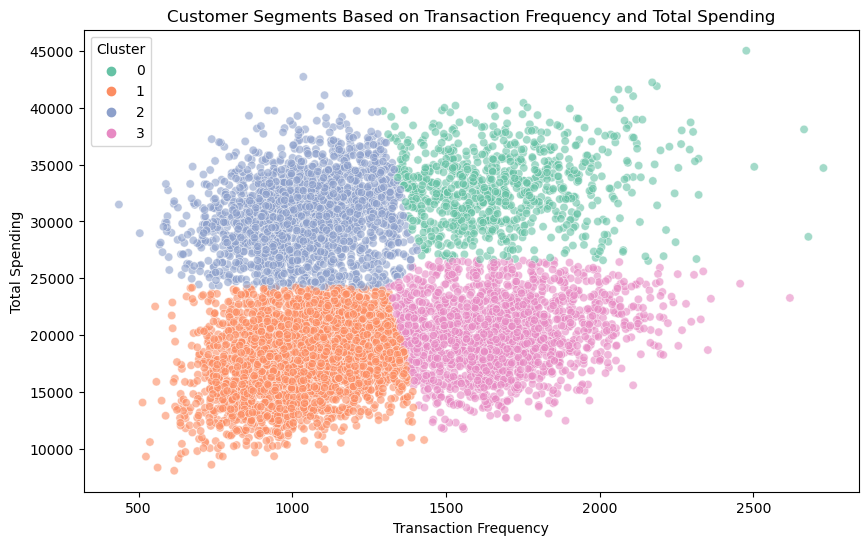

In [44]:
### cluster based segmentation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['transaction_frequency', 'total_spending']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='transaction_frequency', y='total_spending', hue='cluster', palette='Set2', alpha=0.6)
plt.title('Customer Segments Based on Transaction Frequency and Total Spending')
plt.xlabel('Transaction Frequency')
plt.ylabel('Total Spending')
plt.legend(title='Cluster')
plt.show()


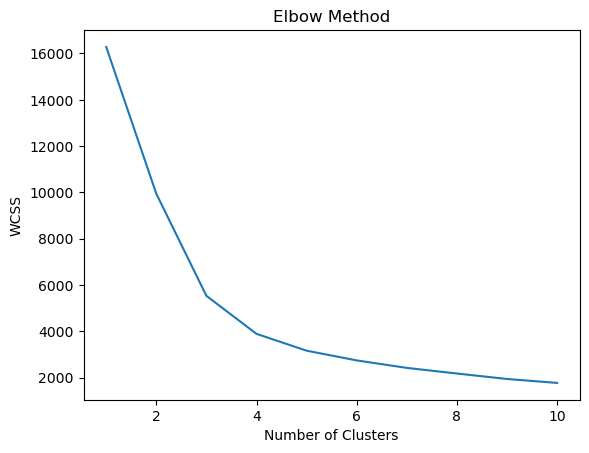

In [45]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features for clustering
X = customer_data[['transaction_frequency', 'total_spending']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### 3. Segmentation by 'To Randomly Generated Account' (to whoom they are paying)

In [46]:
# Count the number of transactions for each account type
account_type_counts = data['to_randomly_generated_account'].value_counts()
account_type_counts

PUB                           834380
BAR                           770414
LOCAL_WATERING_HOLE           649043
COFFEE_SHOP                   476099
TOTALLY_A_REAL_COFFEE_SHOP    476064
                               ...  
74519                              2
24699                              2
1243                               2
95337                              2
20594                              1
Name: to_randomly_generated_account, Length: 14300, dtype: int64

In [47]:
# Group the data by 'from_totally_fake_account' and 'to_randomly_generated_account', then count occurrences
user_spending = data.groupby(['from_totally_fake_account', 'to_randomly_generated_account']).size().reset_index(name='transaction_count')

# Instead of merging, use 'user_spending' DataFrame for analysis directly
print(user_spending.head())

# If you want to analyze or visualize the top N relationships/spendings, you could sort and display
top_user_spending = user_spending.sort_values(by='transaction_count', ascending=False).head(10)
print(top_user_spending)


   from_totally_fake_account to_randomly_generated_account  transaction_count
0                       1000                         16354                 55
1                       1000                         18013                 14
2                       1000                         30208                  6
3                       1000                         31489                 12
4                       1000                         36647                  1
        from_totally_fake_account to_randomly_generated_account  \
7182                         2331                           PUB   
467185                      96560                           BAR   
362062                      74448                           BAR   
67219                       14877           LOCAL_WATERING_HOLE   
395603                      81493                           PUB   
460858                      95160           LOCAL_WATERING_HOLE   
95261                       20251                           PUB

In [48]:
# Find the index of the maximum spending for each user
max_spending_index = data.groupby('from_totally_fake_account')['monopoly_money_amount'].idxmax()

# Use the index to retrieve the corresponding 'to_randomly_generated_account' for the maximum spending
max_spending_by_user = data.loc[max_spending_index, ['from_totally_fake_account', 'to_randomly_generated_account', 'monopoly_money_amount']]
#max_spending_by_user

In [49]:
max_spending_by_user.head()

,from_totally_fake_account,to_randomly_generated_account,monopoly_money_amount
5062638,1000,31489,1960
69652,1002,23010,325
173473,1006,80751,205
602608,1018,11822,297
32808,1053,57069,369


### 3. Segmentation by 'To Randomly Generated Account' (to whoom they are paying)

In [50]:
# Count the number of transactions for each account type
account_type_counts = data['to_randomly_generated_account'].value_counts()
account_type_counts

PUB                           834380
BAR                           770414
LOCAL_WATERING_HOLE           649043
COFFEE_SHOP                   476099
TOTALLY_A_REAL_COFFEE_SHOP    476064
                               ...  
74519                              2
24699                              2
1243                               2
95337                              2
20594                              1
Name: to_randomly_generated_account, Length: 14300, dtype: int64

In [51]:
# Display the top 10 most frequent transaction pairs
top_transactions = user_spending.sort_values(by='transaction_count', ascending=False).head(10)
print(top_transactions)

# If you're interested in specific accounts, you can filter them like this:
# Replace 12345 with the actual account number you're interested in.
specific_account_transactions = user_spending[user_spending['from_totally_fake_account'] == 12345]
print(specific_account_transactions)

        from_totally_fake_account to_randomly_generated_account  \
7182                         2331                           PUB   
467185                      96560                           BAR   
362062                      74448                           BAR   
67219                       14877           LOCAL_WATERING_HOLE   
395603                      81493                           PUB   
460858                      95160           LOCAL_WATERING_HOLE   
95261                       20251                           PUB   
7176                         2331           LOCAL_WATERING_HOLE   
284252                      58697                           BAR   
186504                      38552                           PUB   

        transaction_count  
7182                  410  
467185                406  
362062                397  
67219                 394  
395603                393  
460858                393  
95261                 389  
7176                  387  
284252    

In [52]:
# Find the index of the maximum spending for each user
max_spending_index = data.groupby('from_totally_fake_account')['monopoly_money_amount'].idxmax()

# Use the index to retrieve the corresponding 'to_randomly_generated_account' for the maximum spending
max_spending_by_user = data.loc[max_spending_index, ['from_totally_fake_account', 'to_randomly_generated_account', 'monopoly_money_amount']]
max_spending_by_user

,from_totally_fake_account,to_randomly_generated_account,monopoly_money_amount
5062638,1000,31489,1960
69652,1002,23010,325
173473,1006,80751,205
602608,1018,11822,297
32808,1053,57069,369
...,...,...,...
261196,100931,88568,323
109740,100934,82585,262
9373566,100947,ELECTRONICS_SHOP,276
8891691,100986,FASHION_SHOP,197


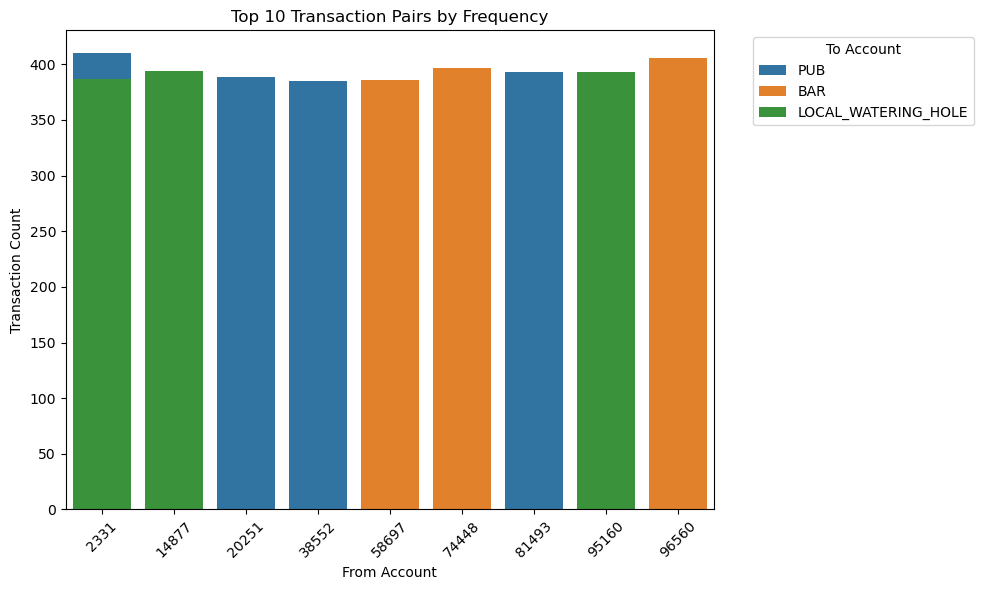

In [53]:
# Let's create some visualizations based on the user_spending DataFrame to understand the transaction patterns.

# First, let's look at the top 10 most frequent transaction pairs for visualization.
top_transactions = user_spending.sort_values(by='transaction_count', ascending=False).head(10)

# Plotting the top 10 most frequent transaction pairs
plt.figure(figsize=(10, 6))
sns.barplot(data=top_transactions, x='from_totally_fake_account', y='transaction_count', hue='to_randomly_generated_account', dodge=False)
plt.title('Top 10 Transaction Pairs by Frequency')
plt.xlabel('From Account')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.legend(title='To Account', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

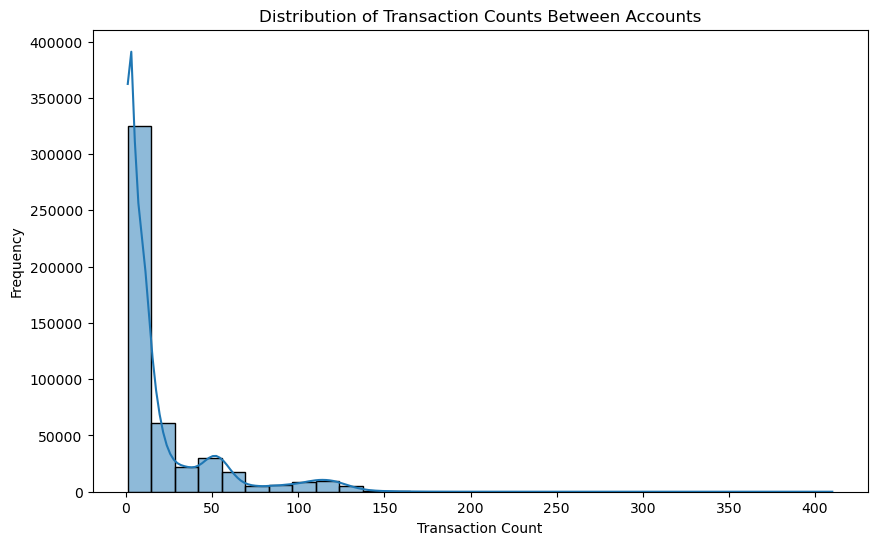

In [54]:
# Let's also visualize the distribution of transaction counts to see the general activity level.
plt.figure(figsize=(10, 6))
sns.histplot(user_spending['transaction_count'], bins=30, kde=True)
plt.title('Distribution of Transaction Counts Between Accounts')
plt.xlabel('Transaction Count')
plt.ylabel('Frequency')
plt.show()

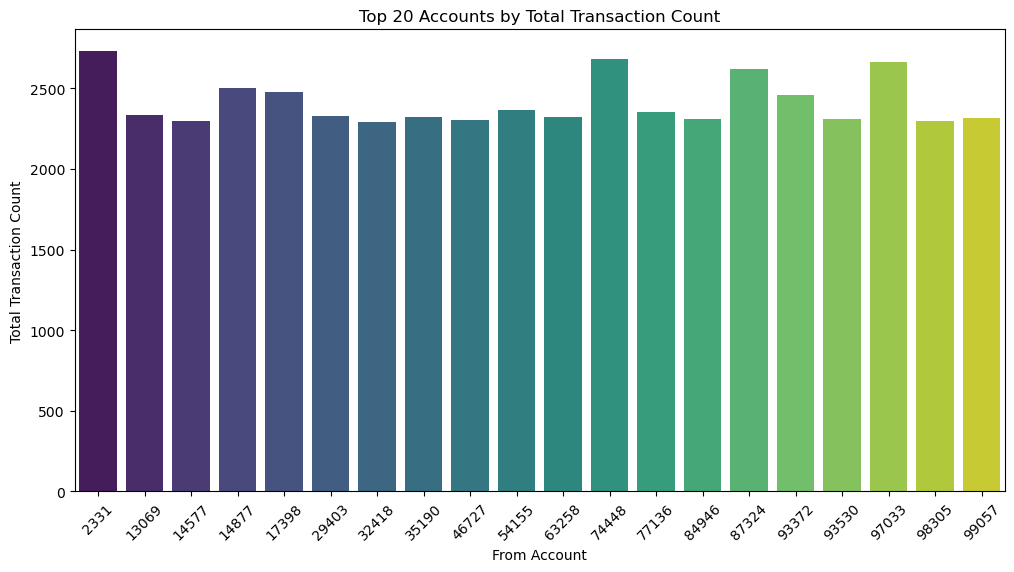

In [55]:
# For a broader understanding, visualize the total number of transactions per "from" account.
transactions_per_account = user_spending.groupby('from_totally_fake_account')['transaction_count'].sum().reset_index()

# Visualizing the total transaction counts per account (top 20 for brevity)
top_accounts_by_transactions = transactions_per_account.sort_values(by='transaction_count', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_accounts_by_transactions, x='from_totally_fake_account', y='transaction_count', palette='viridis')
plt.title('Top 20 Accounts by Total Transaction Count')
plt.xlabel('From Account')
plt.ylabel('Total Transaction Count')
plt.xticks(rotation=45)
plt.show()

### 4. Segmentation by Date (On which date)

### Weekly: 

In [76]:


# Ensure the date column is in datetime format and adjust if your dates are formatted differently
data['not_happened_yet_date'] = pd.to_datetime(data['not_happened_yet_date'], format='%d/%m/%Y')

# Adjust the 'not_happened_yet_date' so the week starts on Monday and aligns with a full week context
data['adjusted_week_start'] = data['not_happened_yet_date'] - pd.to_timedelta(data['not_happened_yet_date'].dt.weekday, unit='d')

# Group by customer ID and adjusted week start, then sum transaction amounts
weekly_spending = data.groupby(['from_totally_fake_account', 'adjusted_week_start'])['monopoly_money_amount'].sum().reset_index()

# Pivot the table to see each user's spending per adjusted week
weekly_pivot = weekly_spending.pivot(index='from_totally_fake_account', columns='adjusted_week_start', values='monopoly_money_amount')

# Calculate the total weekly spending for each user
weekly_pivot['Total_Weekly_Spending'] = weekly_pivot.sum(axis=1)

# Identify the top 10 users by total weekly spending
top_10_weekly_users = weekly_pivot.sort_values('Total_Weekly_Spending', ascending=False).head(10)

# Print the top 10 users
print(top_10_weekly_users)


adjusted_week_start        2024-12-30 00:00:00  2025-01-06 00:00:00  \
from_totally_fake_account                                             
17398                                    452.0               2106.0   
18827                                    105.0               2309.0   
72758                                    220.0                283.0   
64691                                    253.0                522.0   
3458                                     226.0                813.0   
62998                                    269.0               1758.0   
42371                                    587.0                518.0   
7791                                     325.0               2268.0   
33739                                    319.0               2337.0   
82953                                    314.0                286.0   

adjusted_week_start        2025-01-13 00:00:00  2025-01-20 00:00:00  \
from_totally_fake_account                                             
17398

In [56]:
# Grouping by User and Week, calculating weekly spend
weekly_spending = data.groupby([data['from_totally_fake_account'], data['not_happened_yet_date'].dt.to_period('W')])['monopoly_money_amount'].sum()

# Resetting index and pivoting the data
weekly_spending = weekly_spending.reset_index().pivot(index='from_totally_fake_account', columns='not_happened_yet_date', values='monopoly_money_amount')

# Printing the weekly spend for each user
print("Weekly Spend by User:")
print(weekly_spending)

Weekly Spend by User:
not_happened_yet_date      2024-12-30/2025-01-05  2025-01-06/2025-01-12  \
from_totally_fake_account                                                 
1000                                       354.0                 1752.0   
1002                                       484.0                  154.0   
1006                                       133.0                  531.0   
1018                                       118.0                  292.0   
1053                                       502.0                  142.0   
...                                          ...                    ...   
100931                                     282.0                  651.0   
100934                                     465.0                  356.0   
100947                                     320.0                  281.0   
100986                                      91.0                  552.0   
100988                                     183.0                  375.0   

no

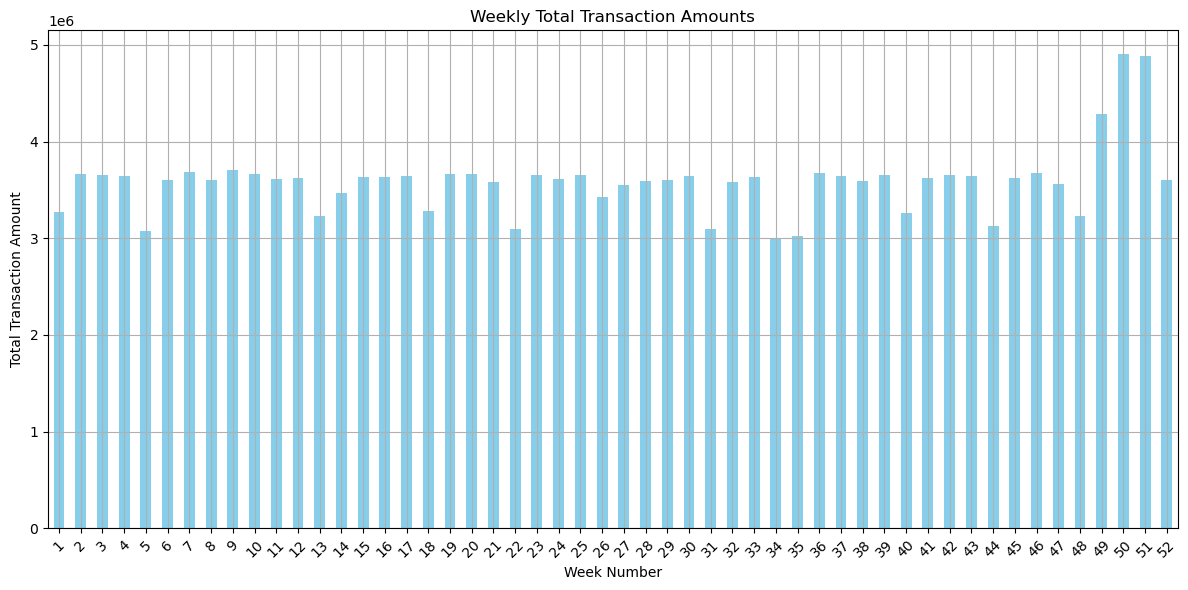

In [80]:

# Group by week number and sum transaction amounts directly within the function
weekly_totals = data.groupby(data['not_happened_yet_date'].dt.isocalendar().week)['monopoly_money_amount'].sum()

# Plotting the weekly transaction totals
plt.figure(figsize=(12, 6))
weekly_totals.plot(kind='bar', color='skyblue')
plt.title('Weekly Total Transaction Amounts')
plt.xlabel('Week Number')
plt.ylabel('Total Transaction Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust subplots to give some padding between them for labels

# Show the plot
plt.show()


### Monthly 

In [58]:
# Grouping by User and Week, calculating weekly spend
m_spending = data.groupby([data['from_totally_fake_account'], data['not_happened_yet_date'].dt.to_period('M')])['monopoly_money_amount'].sum()

# Resetting index and pivoting the data
m_spending =m_spending.reset_index().pivot(index='from_totally_fake_account', columns='not_happened_yet_date', values='monopoly_money_amount')

# Printing the weekly spend for each user
print("m Spend by User:")
print(m_spending)

m Spend by User:
not_happened_yet_date      2025-01  2025-02  2025-03  2025-04  2025-05  \
from_totally_fake_account                                                
1000                          2566     2868     2333     1872     1831   
1002                          1087     1414     1263     1126     1516   
1006                          1484     1279     1449     1723     1635   
1018                          1151      976     1118     1517     1086   
1053                          1030     1767     1683     1485     1521   
...                            ...      ...      ...      ...      ...   
100931                        1849     1527     1804     1750     2109   
100934                        1552     1563     1883     1285     1424   
100947                        1565     1172     1439     1664     2007   
100986                        1276     1179     1442      871     1015   
100988                        1651     1684     1590     1877     1550   

not_happened_yet_dat

In [59]:
m_spending.head()

not_happened_yet_date,2025-01,2025-02,2025-03,2025-04,2025-05,2025-06,2025-07,2025-08,2025-09,2025-10,2025-11,2025-12
from_totally_fake_account,,,,,,,,,,,,
1000,2566,2868,2333,1872,1831,2552,2939,2500,2165,2497,1876,2604
1002,1087,1414,1263,1126,1516,1145,1564,1067,1118,1421,1272,1597
1006,1484,1279,1449,1723,1635,1678,1390,1740,1449,1503,1642,1743
1018,1151,976,1118,1517,1086,1691,1245,1452,1295,1420,1176,1570
1053,1030,1767,1683,1485,1521,1207,1547,1885,1951,1516,1639,2166


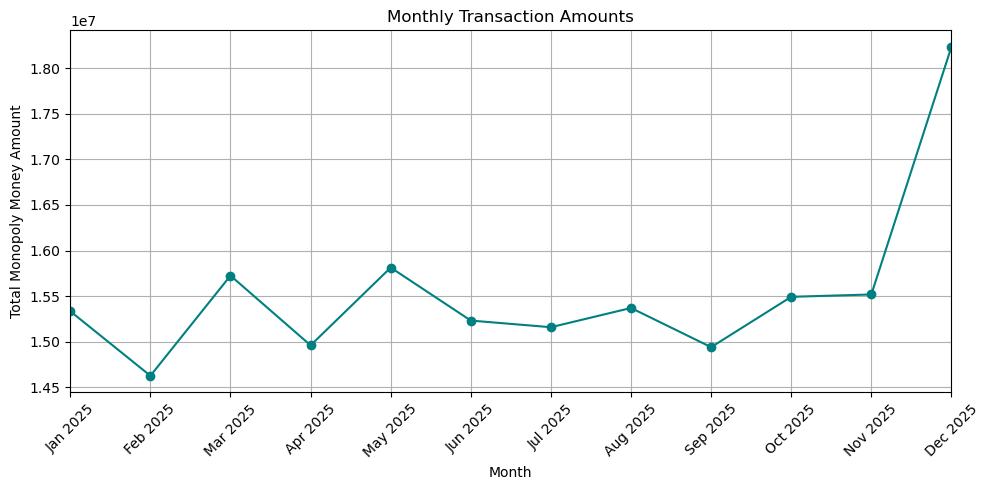

In [81]:

# Resample data to a monthly frequency, summing up the transaction amounts
monthly_transactions = data.resample('M', on='not_happened_yet_date')['monopoly_money_amount'].sum()

# Plotting monthly transaction amounts
plt.figure(figsize=(10, 5))
monthly_transactions.plot(title='Monthly Transaction Amounts', color='teal', marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Monopoly Money Amount')  # Label the y-axis as required
plt.grid(True)
plt.xticks(monthly_transactions.index, monthly_transactions.index.strftime('%b %Y'), rotation=45)  # Formatting the x-axis labels to show month and year
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


In [86]:

# Calculate total spend and count of transactions per customer
customer_stats = data.groupby('from_totally_fake_account').agg(
    Total_Spend=('monopoly_money_amount', 'sum'),
    Transaction_Count=('monopoly_money_amount', 'count'),
    Average_Spend_Per_Transaction=('monopoly_money_amount', 'mean')
).reset_index()

# Define thresholds for high spending and frequent transactions
high_spend_threshold = customer_stats['Total_Spend'].quantile(0.90)
frequent_transaction_threshold = customer_stats['Transaction_Count'].quantile(0.90)

# Segment customers
high_value_customers = customer_stats[customer_stats['Total_Spend'] >= high_spend_threshold]
frequent_low_value_customers = customer_stats[(customer_stats['Transaction_Count'] >= frequent_transaction_threshold) & (customer_stats['Total_Spend'] < high_spend_threshold)]

print("High Value Customers:")
print(high_value_customers.head())

print("\nFrequent Low-Value Customers:")
print(frequent_low_value_customers.head())


High Value Customers:
    from_totally_fake_account  Total_Spend  Transaction_Count  \
22                       1214        36507               1589   
29                       1309        34137               1180   
34                       1399        33723                974   
49                       1607        33136               1737   
52                       1623        36220               1192   

    Average_Spend_Per_Transaction  
22                      22.974827  
29                      28.929661  
34                      34.623203  
49                      19.076569  
52                      30.385906  

Frequent Low-Value Customers:
    from_totally_fake_account  Total_Spend  Transaction_Count  \
2                        1006        18715               1841   
37                       1460        16376               1811   
45                       1563        19310               2015   
53                       1631        17476               1948   
61             

### Yearly:

In [61]:
# Grouping by User and Week, calculating weekly spend
y_spending = data.groupby([data['from_totally_fake_account'], data['not_happened_yet_date'].dt.to_period('Y')])['monopoly_money_amount'].sum()

# Resetting index and pivoting the data
y_spending =y_spending.reset_index().pivot(index='from_totally_fake_account', columns='not_happened_yet_date', values='monopoly_money_amount')

# Printing the weekly spend for each user
print("yearly Spend by User:")
print(y_spending)

yearly Spend by User:
not_happened_yet_date       2025
from_totally_fake_account       
1000                       28603
1002                       15590
1006                       18715
1018                       15697
1053                       19397
...                          ...
100931                     22289
100934                     18541
100947                     20765
100986                     15284
100988                     19651

[8142 rows x 1 columns]


In [62]:
# Summing up the weekly spending for each user
y_spending['Total'] = y_spending.sum(axis=1)

# Sorting users based on their total spending
y_top_10_users = y_spending.nlargest(10, 'Total')

# Printing the top 10 users
print("Top 10 Users by monthly Spending:")
print(y_top_10_users)

Top 10 Users by monthly Spending:
not_happened_yet_date       2025  Total
from_totally_fake_account              
17398                      45029  45029
18827                      42735  42735
72758                      42242  42242
64691                      41912  41912
3458                       41847  41847
62998                      41622  41622
42371                      41607  41607
7791                       41288  41288
33739                      41281  41281
82953                      41116  41116


### Lets see who spent more and where..... in whole data

In [63]:
# Calculate total amount spent by each user
user_spending = data.groupby('from_totally_fake_account')['monopoly_money_amount'].sum()

# Find the user who spent the most money
user_with_max_spending = user_spending.idxmax()
max_spending_amount = user_spending.max()

print("User with the most spending:", user_with_max_spending)
print("Total amount spent by the user:", max_spending_amount)

# Find the transaction types where the user spent the most money
transactions_of_max_spender = data[data['from_totally_fake_account'] == user_with_max_spending]
max_spending_transaction_type = transactions_of_max_spender.groupby('to_randomly_generated_account')['monopoly_money_amount'].sum().idxmax()

print("Transaction type where the user spent the most money:", max_spending_transaction_type)

User with the most spending: 17398
Total amount spent by the user: 45029
Transaction type where the user spent the most money: 23639


### WEEKLY MONTHLY YEARLY TOP USER PLOTS 

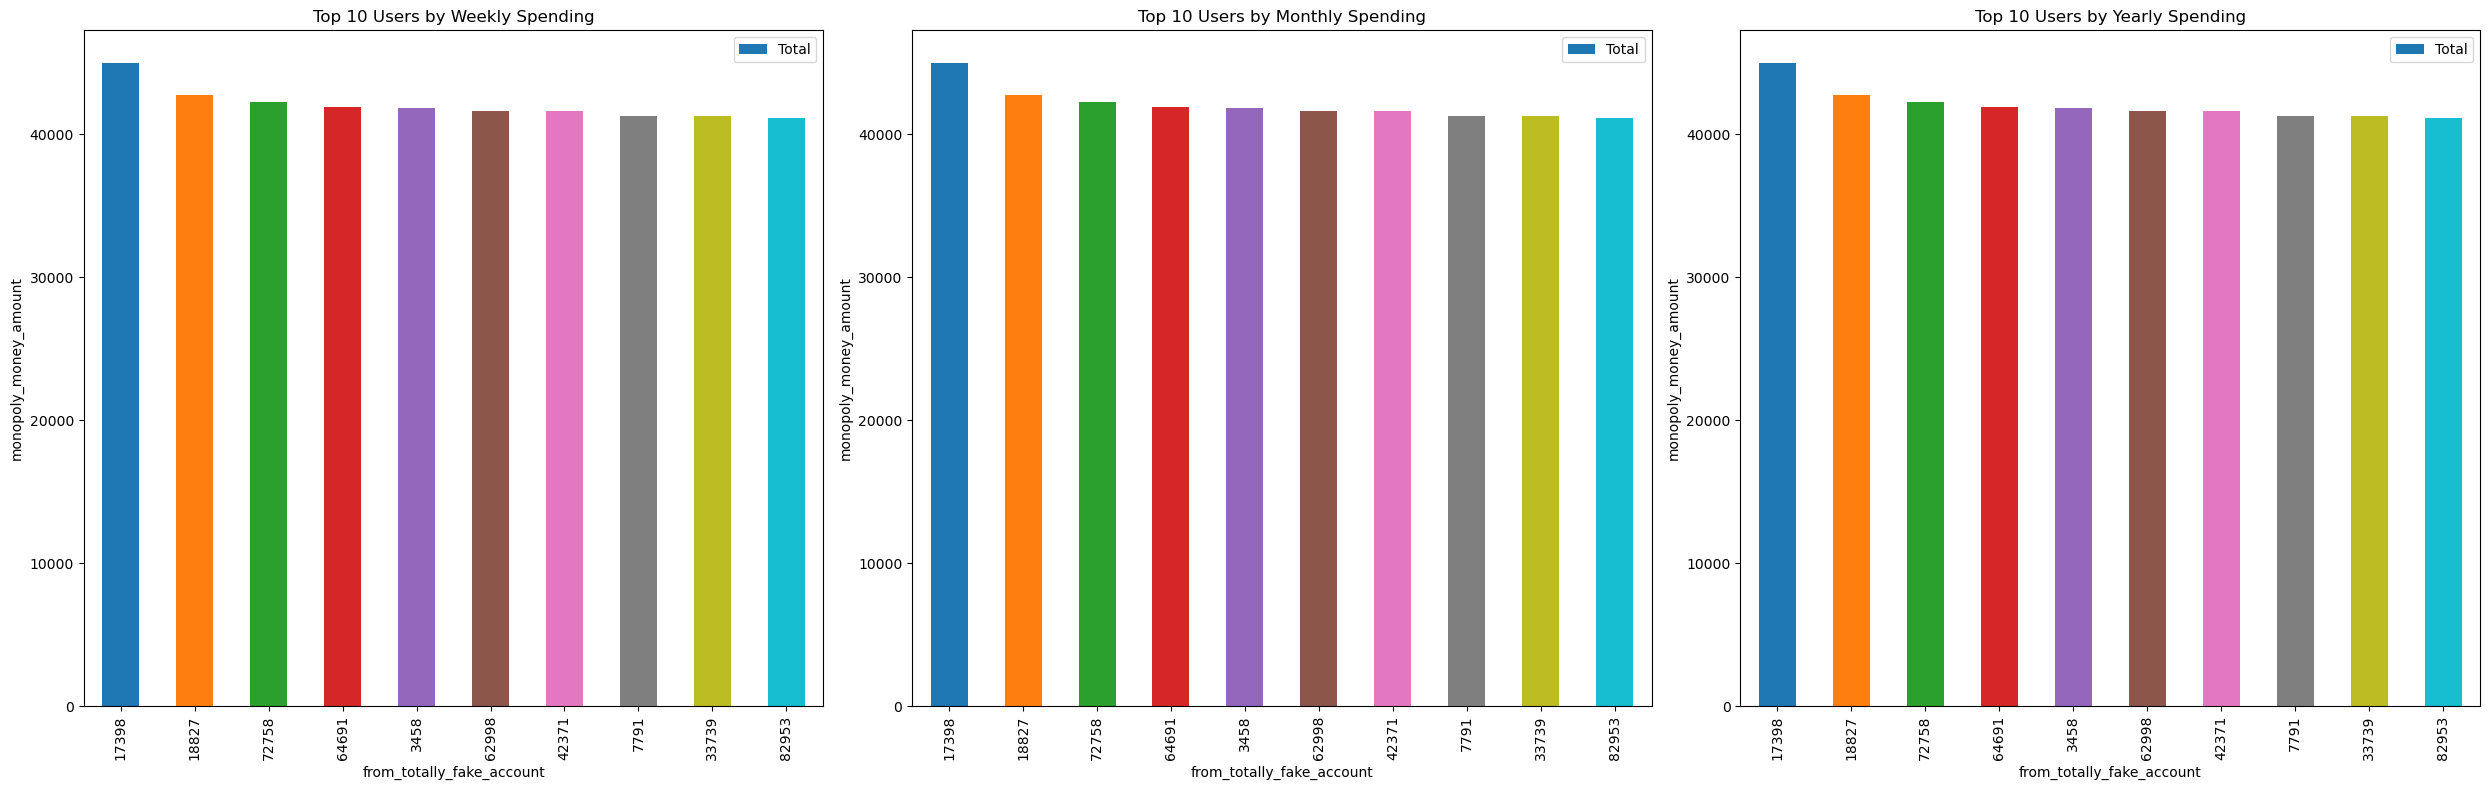

In [64]:
# Define a colormap
colors = plt.cm.tab10.colors  # You can choose any other colormap

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 8))

# Plot for weekly spending
w_top_10_users.plot(kind='bar', y='Total', ax=axes[0], color=colors)
axes[0].set_title('Top 10 Users by Weekly Spending')
axes[0].set_xlabel('from_totally_fake_account')
axes[0].set_ylabel('monopoly_money_amount')

# Plot for monthly spending
m_top_10_users.plot(kind='bar', y='Total', ax=axes[1], color=colors)
axes[1].set_title('Top 10 Users by Monthly Spending')
axes[1].set_xlabel('from_totally_fake_account')
axes[1].set_ylabel('monopoly_money_amount')

# Plot for yearly spending
y_top_10_users.plot(kind='bar', y='Total', ax=axes[2], color=colors)
axes[2].set_title('Top 10 Users by Yearly Spending')
axes[2].set_xlabel('from_totally_fake_account')
axes[2].set_ylabel('monopoly_money_amount')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()